tstat,pval = ttest_1samp(chol_hd,240,alternative="greater")

In [26]:
import pandas as pd
import numpy as np

# load data
heart = pd.read_csv('heart_disease.csv')
yes_hd = heart[heart.heart_disease == 'presence']
no_hd = heart[heart.heart_disease == 'absence']
chol_hd = yes_hd.chol
nonchol_hd = no_hd.chol 
chol = np.mean(chol_hd)
nonchol = np.mean(nonchol_hd)
nonchol

242.640243902439

In [22]:
#для сердечников
# tstat>1.96
#значит, в среднем по совокупности значение холестерола выше 240 милиграм
#251>240 -значимо 
from scipy.stats import ttest_1samp
tstat,pval = ttest_1samp(chol_hd,240,alternative="greater")
tstat,pval
pval<0.05

True

In [35]:
#для несердечников
from scipy.stats import ttest_1samp,binom_test
tstat,pval = ttest_1samp(nonchol_hd,240)
tstat,pval
pval>0.05

True

In [44]:
#вывод процент в наблюдамой выборке значительно больше процента заболевших в тестовой выборке, значимо больше 8%
num_patients = len(heart)
num_highfbs_patients = len(heart[heart.fbs == 1])
num_highfbs_patients
diabetes_risks = num_highfbs_patients/num_patients
hypotesis_count_diabetes = 0.08*len(heart)
num_highfbs_patients,hypotesis_count_diabetes

p_val = binom_test(num_highfbs_patients, num_patients, .08,alternative = 'greater')
p_val

4.689471951449078e-05

two_sample_testing

In [78]:
# import seaborn as sns

from scipy.stats import ttest_ind 
import numpy as np 
import random
# tstat, pval = ttest_ind(times_version1, times_version2)
population = list(range(0,160))
a_array = random.sample(population, 20)
b_array = random.sample(population, 20)

# c = random.sample(population, 20)

# ttest_2,a_c_pval = ttest_ind(a, c)
# ttest_3,b_c_pval = ttest_ind(b, c)



nan


In [81]:
array1  = a_array
array2 = b_array
ttest,a_b_pval = ttest_ind(a_array, b_array)
print(ttest,a_b_pval)

-1.3851601517242866 0.17408166940098996


0.1516702437654096


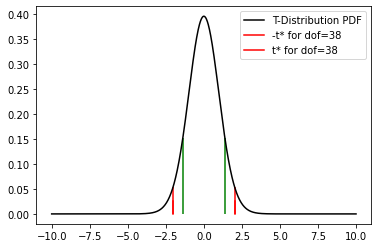

In [84]:
#experiment 3
## Basic T-Distribution
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

## Setup      
dof = 38        # Degrees of freedom
alpha = 0.05    # Significence level
ntails = 2      # Number of tails 
fact = 0.01298
## Calculate critical t-score
tcrit = abs(st.t.ppf(alpha/ntails, dof))
# +=2.068

plt.figure()
xs = np.linspace(-10,10,1000)
plt.plot(xs, st.t.pdf(xs,dof), 'k', label="T-Distribution PDF")

## Plot some vertical lines representing critical t-score cutoff
critline = np.linspace(0,alpha/ntails)  # y range for critical line, AKA probability from 0-p*
xs_1 = len(critline) * [-tcrit]         # X ranges for plotting
xs_2 = len(critline) * [tcrit]
plt.plot(xs_1, critline, 'r', label="-t* for dof=38")
plt.plot(xs_2, critline,'r', label="t* for dof=38")
plt.vlines([-tcrit, tcrit], 0.0, st.t.pdf(tcrit,dof), colors='r')
plt.vlines([-ttest, ttest], 0.0, st.t.pdf(ttest,dof), colors='g')
plt.legend()
print(st.t.pdf(ttest,dof))


In [27]:
np.mean([np.var(a),np.var(b)]),np.mean(a),np.mean(b)

(2277.09375, 85.95, 76.4)

In [28]:
res  = 9.35/(2277.0938 * 0.31623)
res

0.012984571494869597

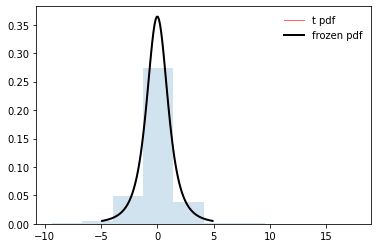

In [59]:
#experiment 1
from scipy.stats import t
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
df = 2.74
mean, var, skew, kurt = t.stats(df, moments='mvsk')
x = np.linspace(t.ppf(0.01, df),
                t.ppf(0.99, df), 100)
ax.plot(x, t.pdf(x, df),
       'r-', lw=1, alpha=0.6, label='t pdf')
rv = t(df)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
vals = t.ppf([0.001, 0.5, 0.999], df)
np.allclose([0.001, 0.5, 0.999], t.cdf(vals, df))  
r = t.rvs(df, size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()     

In [39]:
mean, var, skew, kurt

(array(0.), array(3.7027027), array(nan), array(inf))

In [69]:
print(tcrit)

2.0243941645751367
